In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.11.0


In [23]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [28]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [29]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)


(8000, 11)
(8000,)


In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)

(8000, 11)


In [8]:
# Part 2 - Now let's make the ANN!

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [32]:
# Initialising the ANN
classifier = Sequential()

In [33]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [34]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [35]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [36]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 2s 2ms/step - loss: 2.1591 - accuracy: 0.7554 - val_loss: 1.8330 - val_accuracy: 0.7736
Epoch 2/50
536/536 [==============================] - 1s 2ms/step - loss: 1.2348 - accuracy: 0.7662 - val_loss: 0.7804 - val_accuracy: 0.7728
Epoch 3/50
536/536 [==============================] - 1s 2ms/step - loss: 0.6332 - accuracy: 0.7822 - val_loss: 0.6174 - val_accuracy: 0.7906
Epoch 4/50
536/536 [==============================] - 1s 2ms/step - loss: 0.5578 - accuracy: 0.7925 - val_loss: 0.5762 - val_accuracy: 0.7970
Epoch 5/50
536/536 [==============================] - 1s 2ms/step - loss: 0.5064 - accuracy: 0.7936 - val_loss: 0.5300 - val_accuracy: 0.7967
Epoch 6/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4810 - accuracy: 0.7996 - val_loss: 0.5199 - val_accuracy: 0.8001
Epoch 7/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4742 - accuracy: 0.8063 - val_loss: 0.5107 - val_accuracy: 0.8054
Epoch 

In [16]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


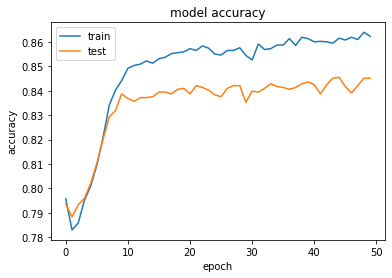

In [17]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

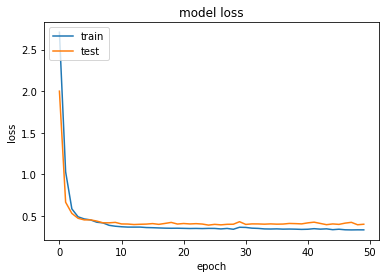

In [18]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 894us/step


In [20]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1519,   76],
       [ 197,  208]], dtype=int64)

In [21]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [22]:
score

0.8635